### Preprocess the image

In [ ]:
!pip install pillow
!pip install tensorflow scikit-image
!pip install tensorflow

In [7]:
!pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [2]:
from PIL import Image

# Open an image file
with Image.open('sample/image.png') as img:
    # Resize the image to 255x255 pixels
    resized_img = img.resize((255, 255))

    # Save the resized image
    resized_img.save('output/resized_image.jpg')

    # Optionally, display the resized image
    resized_img.show()

### use the model

TypeError: Image data of dtype <U24 cannot be converted to float

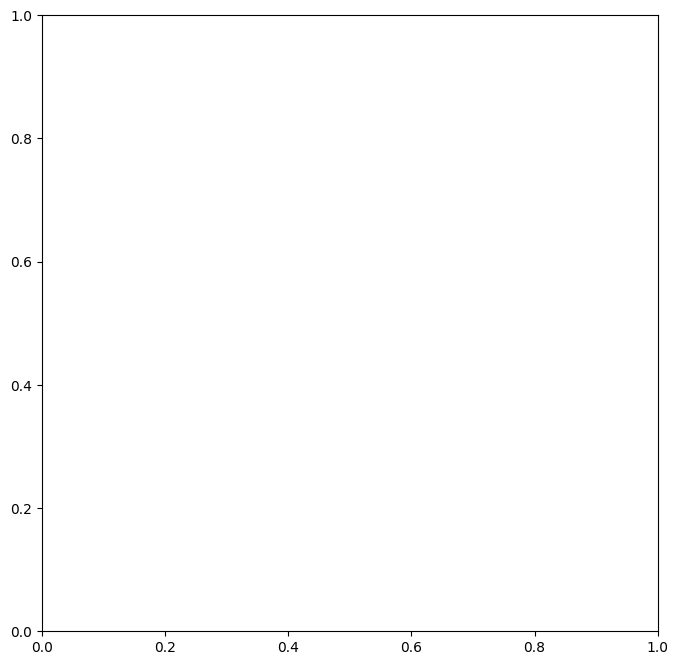

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import json
from skimage.transform import resize

# Define custom loss function
def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

# Load the U-Net model with custom objects (including custom loss function)
with keras.utils.custom_object_scope({'dice_loss': dice_loss}):
    # Define custom IoU metric function
    def iou_metric(y_true, y_pred):
        intersection = np.logical_and(y_true, y_pred)
        union = np.logical_or(y_true, y_pred)
        iou = np.sum(intersection) / np.sum(union)
        return iou

    # Load the U-Net model with custom objects (including custom loss function and metric)
    model = keras.models.load_model('old_model.h5', compile=False)
    model.compile(optimizer='adam', loss=dice_loss, metrics=[iou_metric])

# Function to preprocess an image for segmentation
def preprocess_for_segmentation(image_path, target_size=(256, 256)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 256.0
    return np.expand_dims(img_array, axis=0)

# Function to perform segmentation using the U-Net model
def segment_image(model, image_path):
    preprocessed_image = preprocess_for_segmentation(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image_path, cmap='gray')
    plt.title('Predicted Binary Mask')
    plt.axis('off')
    plt.show()
    segmentation_mask = model.predict(preprocessed_image)[0, :, :, 0]
    return segmentation_mask

# Define the path to the specific image you want to process
image_path = 'output/resized_image.jpg'  # Replace with the actual path to your image

# Perform segmentation
segmentation_result = segment_image(model, image_path)

# Threshold the segmentation mask (you can adjust the threshold)
threshold = 0.23
# binary_mask = (segmentation_result > threshold).astype(np.uint8)

# Display the binary mask
plt.figure(figsize=(8, 8))
plt.imshow(segmentation_result, cmap='gray')
plt.title('Predicted Binary Mask')
plt.axis('off')
plt.show()
